In [1]:
import plotly.express as px
import plotly.io as pio
from torch.nn import CrossEntropyLoss

from utils.torchutils import get_device

pio.templates.default = "simple_white"
# pio.renderers.default = "plotly_mimetype"
pio.renderers.default = "png"

from experiments.datasets.imbalancing import split_with_label_distribution_skew, train_test_split
from experiments.datasets.mnist import MNIST

from models.mnist import CNN, LargeCNN
from experiments.datasets.base import create_dataloader

from torch.optim import SGD, AdamW

In [2]:
BASEDIR = "../output"

N_CLIENTS = 50
GAMMA = 0.8
BATCH_SIZE = 64
LR = 2e-3
EPOCHS = 5
ROUNDS = 50
ALPHA = 1
MU = 0
MODEL = CNN

In [3]:
dataset = MNIST("/tmp/data").train_data()

client_datasets = split_with_label_distribution_skew(dataset, ALPHA, N_CLIENTS)
client_train_datasets, client_test_datasets = train_test_split(client_datasets)

client_train_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_train_datasets]
client_test_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_test_datasets]

In [4]:
def create_optimizer(params):
    return SGD(params, LR)

In [5]:
from federated_learning.flsc import FLSC

flsc = FLSC(
    model_class=MODEL,
    loss=CrossEntropyLoss(),
    optimizer=create_optimizer,
    rounds=ROUNDS,
    epochs=EPOCHS,
    n_clusters=5,
    clusters_per_client=3,
    clients_per_round=GAMMA,
    device=get_device()
)

results = flsc.fit(client_train_dataloaders, client_test_dataloaders)

Using device 'cuda'
Training 40 per round


Round:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
df = results.as_dataframe()
df = df.pivot_table(columns=["variable"], values="value", index=["round", "client", "stage"])\
    .reset_index()
df = df.drop(columns=["cluster_identities", "client"]).groupby(["round", "stage"]).mean().reset_index()
df.head()

variable,round,stage,accuracy,loss
0,0,test,0.284264,2.240954
1,0,train,NaN,2.272131
2,1,test,0.187488,2.215966
3,1,train,NaN,2.259499
4,2,test,0.108165,2.190948


In [7]:
df

variable,round,stage,accuracy,loss
0,0,test,0.284264,2.240954
1,0,train,NaN,2.272131
2,1,test,0.187488,2.215966
3,1,train,NaN,2.259499
4,2,test,0.108165,2.190948
...,...,...,...,...
95,47,train,NaN,0.762199
96,48,test,0.790061,0.625918
97,48,train,NaN,0.732616
98,49,test,0.798514,0.613707


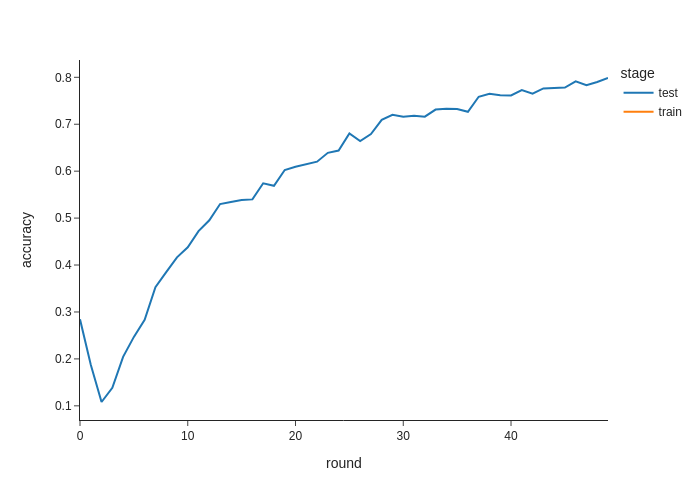

In [8]:
px.line(df, x="round", y="accuracy", color="stage")